In [9]:
# import RDKit ----------------------------------------------------------------
from rdkit import Chem
from rdkit.Chem import Draw

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
#test_smiles = 'C-C=C-C=C'
test_smiles = 'C1=CC=CC=C1C=CC=CC2=CC=CC=C2' #similar to the one directly below
#test_smiles = 'c1ccccc1C=CC=Cc2ccccc2'

#mol = Chem.MolFromSmiles(caffeine_smiles)
mol = Chem.MolFromSmiles(test_smiles)

# draw the modecule -----------------------------------------------------------
#Draw.MolToFile(mol, 'caffeine.png')
Draw.MolToFile(mol, 'molecule.png')
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx(),',',
          bond.GetBondType(),',',
          bond.IsInRing(), ',',
          bond.GetIdx())

#print(mol.GetSubstructMatches(Chem.MolFromSmarts('c')))
for atom in mol.GetAtoms():
    print(atom.GetIdx(),',', atom.GetExplicitValence())

# draw the molecule with property ---------------------------------------------
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    
Draw.MolToFile(mol, 'molecule_with_prop.png')

0 , 1 , AROMATIC , True , 0
1 , 2 , AROMATIC , True , 1
2 , 3 , AROMATIC , True , 2
3 , 4 , AROMATIC , True , 3
4 , 5 , AROMATIC , True , 4
5 , 6 , SINGLE , False , 5
6 , 7 , DOUBLE , False , 6
7 , 8 , SINGLE , False , 7
8 , 9 , DOUBLE , False , 8
9 , 10 , SINGLE , False , 9
10 , 11 , AROMATIC , True , 10
11 , 12 , AROMATIC , True , 11
12 , 13 , AROMATIC , True , 12
13 , 14 , AROMATIC , True , 13
14 , 15 , AROMATIC , True , 14
5 , 0 , AROMATIC , True , 15
15 , 10 , AROMATIC , True , 16
0 , 3
1 , 3
2 , 3
3 , 3
4 , 3
5 , 4
6 , 3
7 , 3
8 , 3
9 , 3
10 , 4
11 , 3
12 , 3
13 , 3
14 , 3
15 , 3


{0: (-3.592284624956486, -0.02152199965896514), 1: (-5.029198474939081, -0.03013079952255119), 2: (-6.120427368828454, -0.009547121511651647), 3: (-5.774742412735234, 0.019645356362833957), 4: (-4.337828562752639, 0.02825415622642001), 5: (-3.246599668863265, 0.007670478215520458), 6: (-1.8096858188806708, 0.016279278079106518), 7: (-0.7184569249912974, -0.004304399931793035), 8: (0.7184569249912971, 0.004304399931793016), 9: (1.8096858188806708, -0.01627927807910653), 10: (3.246599668863265, -0.007670478215520475), 11: (4.337828562752641, -0.02825415622642002), 12: (5.774742412735234, -0.019645356362833974), 13: (6.120427368828455, 0.009547121511651638), 14: (5.02919847493908, 0.030130799522551197), 15: (3.5922846249564864, 0.021521999658965122)}
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

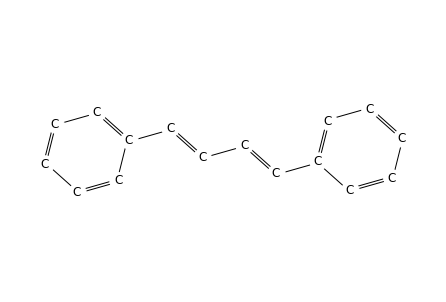

In [2]:
# import library --------------------------------------------------------------
from rdkit import Chem
from rdkit.Chem import AllChem
import networkx as nx
import matplotlib.pyplot as plt
from rdkit.Chem.Draw import IPythonConsole
import itertools

def GetRingSystems(mol):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = []
        for atom in ring:
            ringAts.append(atom)
        systems.append(ringAts)
    return systems

def getRingForAtom(rings, atomId):
    for ring in rings:
        if atomId in ring:
            return ring

# define the smiles string and covert it into a molecule sturcture ------------
#caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
smiles = 'c1ccccc1C=CC=Cc2ccccc2'
mol = Chem.MolFromSmiles(smiles)

# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.DiGraph()
    AllChem.Compute2DCoords(mol)
    rings = GetRingSystems(mol)
    aromAtoms = set()

    for atom in mol.GetAtoms():
        pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
        xCoord = pos.x
        yCoord = pos.y * 0.02
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol(),
                   pos = (xCoord,yCoord))
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        #if its a double bond add a second edge (in other direction)
        if (bond.GetBondType() == Chem.BondType.DOUBLE):
            G.add_edge(bond.GetEndAtomIdx(),
                        bond.GetBeginAtomIdx(),
                        bond_type=bond.GetBondType())
        #in aromatic rings every second edge is a double bond
        #if it is aromatic get corresponding ring and add every second atom from that ring to set (aromAtoms)
        if (bond.GetBondType() == Chem.BondType.AROMATIC):
            ring = getRingForAtom(rings, bond.GetBeginAtomIdx())
            if (ring != None):
                for i in range(0, len(ring), 2):
                    aromAtoms.add(ring[i])
                rings.remove(ring)
        #if beginning atom of bond is in aromAtoms add a second edge (in other direction)
        if (bond.GetBeginAtomIdx() in aromAtoms):
            G.add_edge(bond.GetEndAtomIdx(),
                        bond.GetBeginAtomIdx(),
                        bond_type=bond.GetBondType())
    return G

# convert rdkit object to networkx object --------------------------------------
molecule_nx = mol_to_nx(mol)

molecule_atom = nx.get_node_attributes(molecule_nx, 'atom_symbol')
pos = nx.get_node_attributes(molecule_nx,'pos')
print(pos)

nx.draw(molecule_nx,
        pos,
        labels=molecule_atom,
        with_labels = True,
        node_color='white',
        connectionstyle='bar, fraction=0.03', 
        arrowstyle = '-')

#plt.show()

# print out the adjacency matrix ---------------------------------------------- 
matrix = nx.to_numpy_matrix(molecule_nx)
print(matrix)

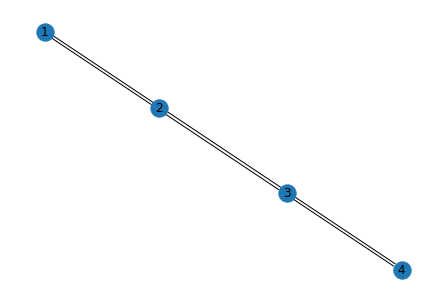

In [3]:
import networkx as nx
  
G = nx.DiGraph() #directed graph
G.add_edge(1,2)
G.add_edge(2,1)
G.add_edge(2,3)
G.add_edge(3,2)
G.add_edge(3,4)
G.add_edge(4,3)
#use bar connectionstyle and replace arrows to allow double edges and make graph look undirected
nx.draw(G, with_labels=True, connectionstyle='bar, fraction=0.01', arrowstyle = '-')

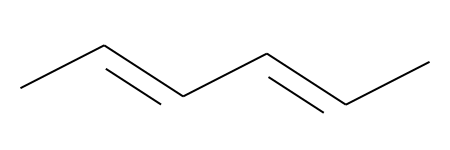

In [4]:
from rdkit.Chem import AllChem

smiles = 'C-C=C-C=C-C'
mol = Chem.MolFromSmiles(smiles)
mol

In [5]:
AllChem.Compute2DCoords(mol)

for c in mol.GetConformers(): #Konformation/ räumliche Anordnung'
    print(c.GetPositions())

pos = mol.GetConformer().GetAtomPosition(0)
pos.x

[[-3.26244072 -0.20971541  0.        ]
 [-1.92701702  0.47339772  0.        ]
 [-0.66771185 -0.34155656  0.        ]
 [ 0.66771185  0.34155656  0.        ]
 [ 1.92701702 -0.47339772  0.        ]
 [ 3.26244072  0.20971541  0.        ]]


-3.262440719227675

In [6]:
import networkx as nx

G=nx.Graph()
G.add_node(1,pos=(-3.26244072,-0.20971541))
G.add_node(2,pos=(-1.92701702,0.47339772))
G.add_node(3,pos=(-0.66771185,-0.34155656))
G.add_node(4,pos=(0.66771185,0.34155656))
G.add_node(5,pos=(1.92701702,-0.47339772))
G.add_node(6,pos=(3.26244072,0.20971541))
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)

pos=nx.get_node_attributes(G,'pos')
pos

{1: (-3.26244072, -0.20971541),
 2: (-1.92701702, 0.47339772),
 3: (-0.66771185, -0.34155656),
 4: (0.66771185, 0.34155656),
 5: (1.92701702, -0.47339772),
 6: (3.26244072, 0.20971541)}

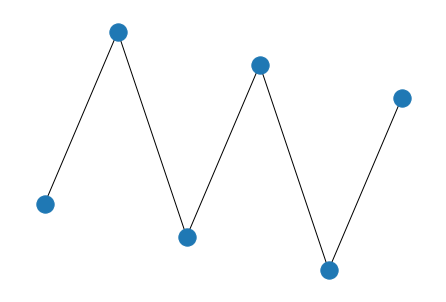

In [7]:
nx.draw(G,pos)

In [18]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

def GetRingSystems(mol):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = []
        for atom in ring:
            ringAts.append(atom)
        systems.append(ringAts)
    return systems

def getRingForAtom(rings, atomId):
    for ring in rings:
        if atomId in ring:
            return ring

mol = Chem.MolFromSmiles('C1=CC=CC=C1C=CC=CC2=CC=CC=C2')
rings = GetRingSystems(mol)
print(rings)
print(getRingForAtom(rings, 4))
print(getRingForAtom(rings, 8))

[[0, 5, 4, 3, 2, 1], [11, 12, 13, 14, 15, 10]]
[0, 5, 4, 3, 2, 1]
None
